In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Business Case :- Based on the given features we have to predict the Employee will leave company or not

In [2]:
# loading the data
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
pd.set_option('Display.max_columns',None)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### Summary About the Data :
    - Dataset contains information about the 1470 employees and 35 columns .  aimed at analyzing and predicting attrition. It includes demographic details (e.g., Age,Gender,Marital Status), job-related factors (e.g.,Job Role, Department, Years at Company), compensation (Monthly Income, Stock Options), and work satisfaction metrics (Job Satisfaction, Environment Satisfaction). The key target variable is Attrition, indicating whether the employee has left the company, allowing for deeper analysis of factors influencing employee turnover.

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Domain Analysis :


1. **Age**l. Represents the age of the employee in years.
   
2. **Attritioncal. Indicates whether the employee has left the company (Yes/No).
   
3. **BusinessTravrical. Describes how frequently the employee travels for business (e.g., "Rarely," "Frequently").
   
4. **Dailymerical. Represents the daily rate of pay for the employee.
   
5. **Depategorical. Shows the department where the employee works (e.g., "Sales," "Research & Development").
   
6. **Distance: Numerical. Measures the distance between the employee's home and the workplace in kilometers or miles.
   
7. *on**: Ordinal. Education level of the employee, often categorized as 1 to 5 (1 being high school and 5 being doctorate).
   
8. **Ed**: Categorical. The field in which the employee's education was pursued (e.g., "Life Sciences," "Medical").
   
9. *Cerical (constant). This column might be a constant for all employees (e.g., 1).
   
10. Number**: Numerical. A unique identifier for each employee.

11. **Envirtisfaction**: Ordinal. Satisfaction with the work environment (1–4 scale, 1 being least satisfied and 4 most satisfied)**Gender**: Categorical. Indicates the gender of the employee (e.g., "Male," "Female").**HourlyRate**: Numerical. The hourly wage of the employee.**JobInvolvement**: Ordinal. The level of involvement the employee feels in their job (1–4 sc  
15. **JobLevel**: Ordinal. The level of the employee in the organizational hi 
16. **JobRole**: Categorical. Specifies the job title or role (e.g., "Manager," "Sales Executive"
17. **JobSatisfaction**: Ordinal. Satisfaction with the job (1–4 s
18. **MaritalStatus**: Categorical. The marital status of the employee (e.g., "Single," "Ma   
19. **MonthlyIncome**: Numerical. Represents the monthly salary of te.
   
20. **MonthlyRate**: Numerical. Monthly rate of compensation, possibly including bonuses or other compen  
21. **NumCompaniesWorked**: Numerical. The number of companies the employee has worked at be
   
22. **Over18**: Categorical (binary). Indicates if the employee is s of age.
   
23. **OverTime**: Categorical. Whether the employee works overNo).
   
24. **PercentSalaryHike**: Numerical. The percentage increase in salary fmployee.
   
25. **PerformanceRating**: Ordinal. The performance rating for the employee, typically on a scale (e.g5).
   
26. **RelationshipSatisfaction**: Ordinal. Satisfaction with relationshre).
   
27. **StandardHours**: Numerical (constant). The standard number of working hours, usually constant for all employees40 hours/week).
   
28. **StockOptionLevel**: Ordinal. The level of stock options granted to te (0-3 scale).
   
29. **TotalWorkingYears**: Numerical. The total number of years the employee has wheir career.
   
30. **TrainingTimesLastYear**: Numerical. The number of times the employee has receining in the last year.
   
31. **WorkLifeBalance**: Ordinal. Rating fe balance (1–4 scale).
   
32. **YearsAtCompany**: Numerical. The number of years the employee has  the current company.
   
33. **YearsInCurrentRole**: Numerical. The number of years the employee hasheir current role.
   
34. **YearsSinceLastPromotion**: Numerical. The number of years sinloyee's last promotion.
   
35. **YearsWithCurrManager**: Numerical. Tical, categorical, or ordinal and provides a brief description for each.

### Problems with Dataset
- Datatype of EducationField , Gender , Marrital Status , OverTime , Attrition
- Std of EmployeeCount, StandaradHours is 0 .
- EmployeeNumber contain all unique values
- Over18 conatin constant data

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.describe(include='O')

### Exploratory Data Analysis 

In [8]:
# Univariate analysis
# using Sweetviz

* People between the age group 25-40 are the majority.
* 70% of the people travel raraely, 20% travel frequently rest do not travel.
* More than 70% of the employees belong to research and development.
* Almost 50% of the people are nearer to the office i.e the distance from their home is lesser than or equal to 10.
* More than 60% of the people have educational qualification of 4 and 5.
* Majority(40%) of the people are from life science field and 30% are from medical field.
* 60% of the people are almost satisfied with environment condition of the office with more than 3 ratings.
* Gender count: 60% male 40% female.
* 60% of the people have partial involvement in job and 20% have good involvement.
* More than 60% employees seem to be satisfied with their job.
* 50% of the people are married, 30% single and the rest are divorced.
* 60% of the people have less thanm 10k income.
* 40% of the people have worked for less than 1 company which implies they are freshers.
* 30% of the people have worked for more than 5 companies.
* 80% of the people have average work rating.
* 60% of the people have worked for the same company only for 5 years or lesser.
* 80% of the people own only 1 or 0 stock at the company.

In [9]:
## Bivariate Analysis
cat_data = df.select_dtypes(include=['O'])
cat_data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

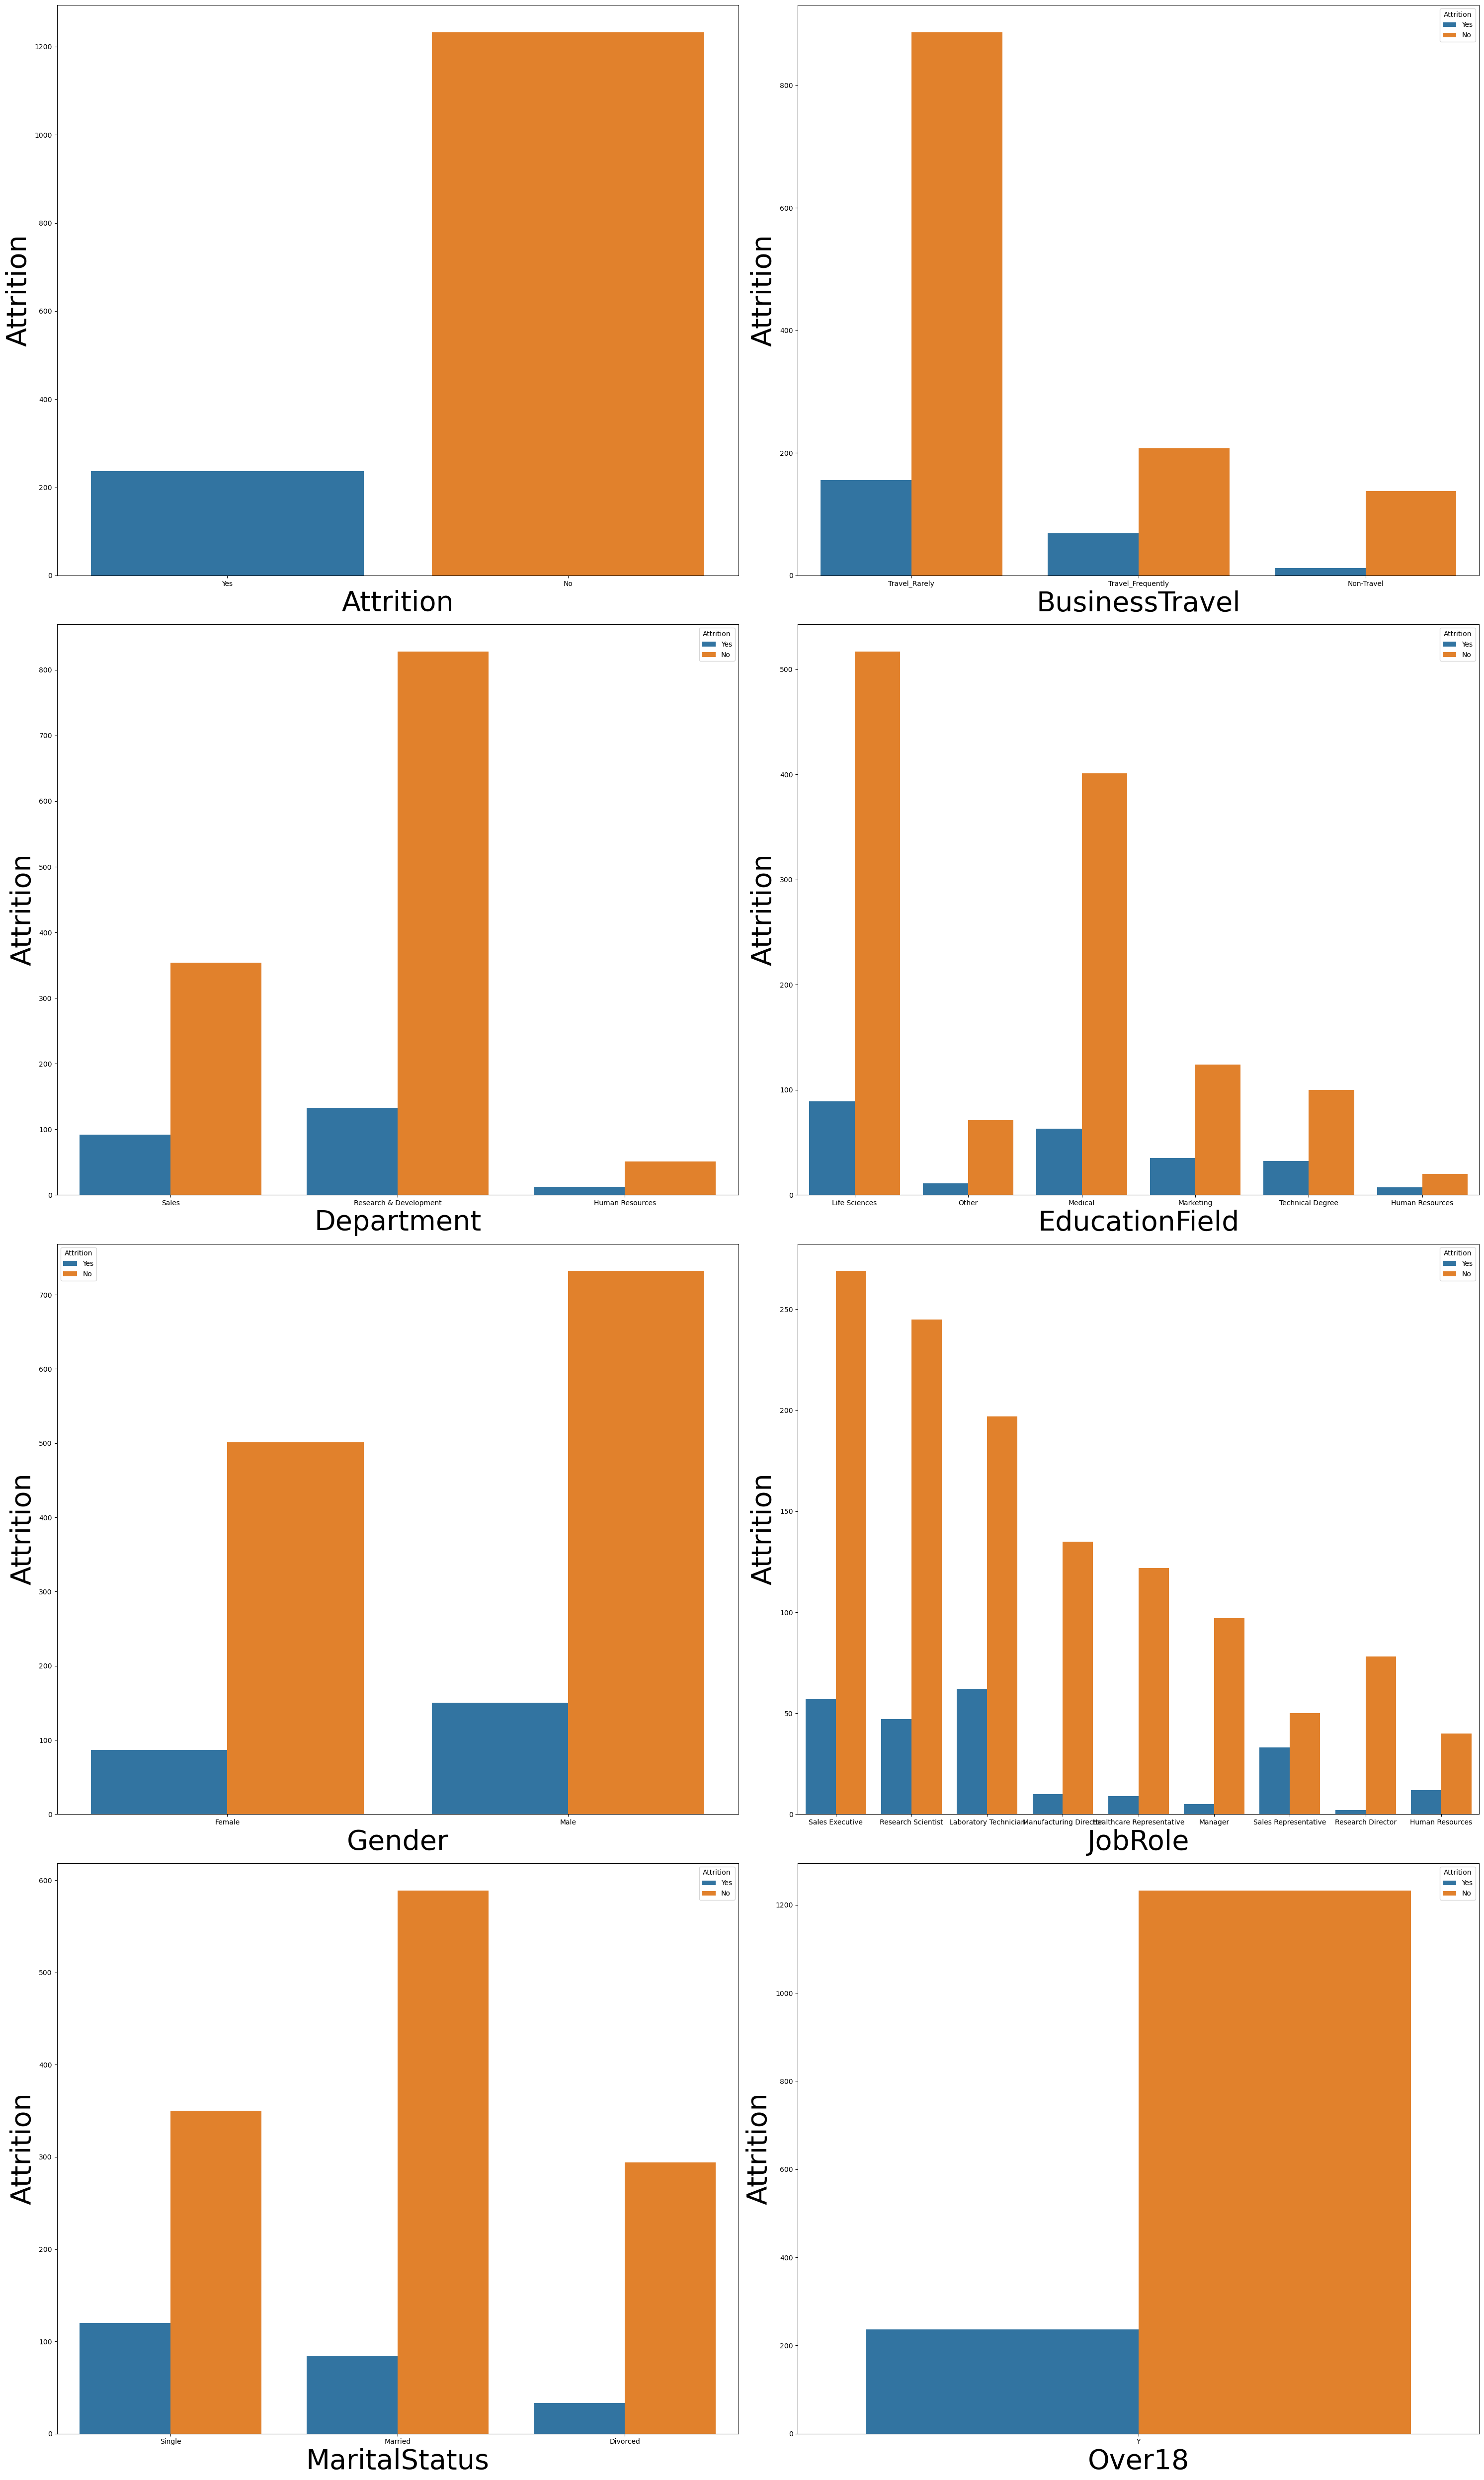

In [10]:
plt.figure(figsize=(30,50), facecolor='white')
plotnumber = 1

for column in cat_data:
    if plotnumber<=8 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x=cat_data[column].dropna(axis=0)
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Attrition',fontsize=40)
    plotnumber+=1
plt.tight_layout()

In [11]:
pd.crosstab(df['BusinessTravel'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


In [12]:
pd.crosstab(df['Department'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [13]:
pd.crosstab(df['EducationField'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
EducationField,,
Human Resources,74.074074,25.925926
Life Sciences,85.313531,14.686469
Marketing,77.987421,22.012579
Medical,86.422414,13.577586
Other,86.585366,13.414634
Technical Degree,75.757576,24.242424


In [14]:
pd.crosstab(df['JobRole'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


In [15]:
pd.crosstab(df['Gender'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


In [16]:
pd.crosstab(df['MaritalStatus'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
MaritalStatus,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


- BusinessTravel vs Attrition : Employee who travel more frequently are more like to quit the job. Then Travel_Rarely and Only few Emp who does not travel are likely to quit the job
- Department vs Attrtion : Emp who are in Sales and R&D Department are more likely to quit their job
- EducationFild vs Attrition : Human Resources ,Technical Degree , Marketing emp who are from these are more likely to quit their job than others
- JobRole vs Attrition : Sales Representative ,Library Technician , Human Resources, Sales Excutive Research Scientist are more likely to quit job than others
- Gender vs Attrition : Gender might does not have effect on the Quitting Job
- MaritalStatus vs Attrition : emp who are single are more likely to quit their job i.e they may want to switch company

In [17]:
# descrete column
data3=df[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

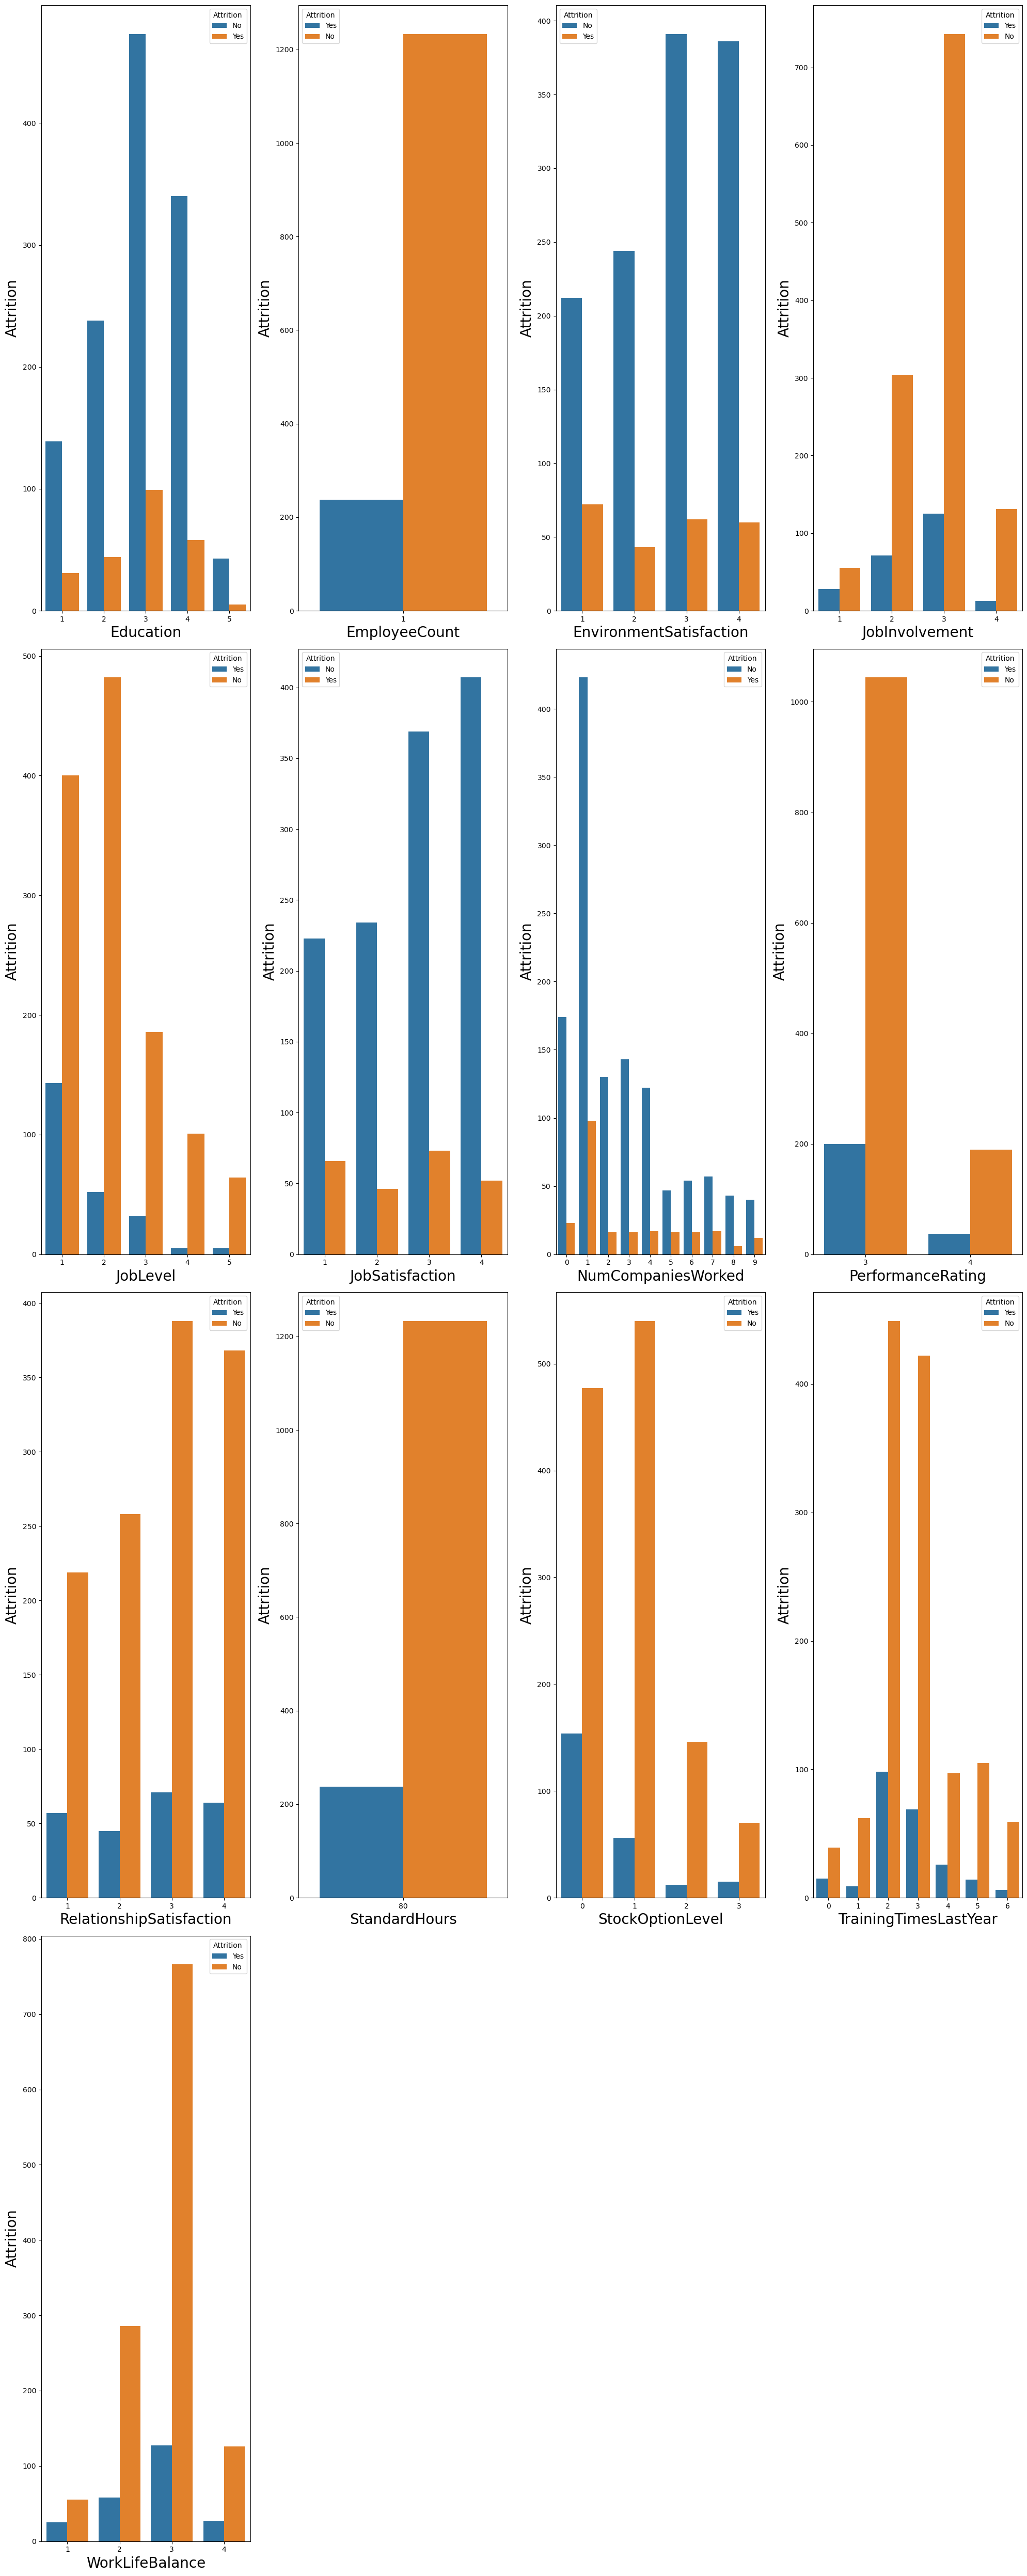

In [18]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in data3:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data3[column].dropna(axis=0)
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [19]:
pd.crosstab(df['Education'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
Education,,
1,81.764706,18.235294
2,84.397163,15.602837
3,82.692308,17.307692
4,85.427136,14.572864
5,89.583333,10.416667


In [20]:
pd.crosstab(df['EnvironmentSatisfaction'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
EnvironmentSatisfaction,,
1,74.647887,25.352113
2,85.017422,14.982578
3,86.313466,13.686534
4,86.547085,13.452915


In [21]:
pd.crosstab(df['JobInvolvement'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
JobInvolvement,,
1,66.265060,33.734940
2,81.066667,18.933333
3,85.599078,14.400922
4,90.972222,9.027778


In [22]:
pd.crosstab(df['JobLevel'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
JobLevel,,
1,73.664825,26.335175
2,90.262172,9.737828
3,85.321101,14.678899
4,95.283019,4.716981
5,92.753623,7.246377


In [23]:
pd.crosstab(df['JobSatisfaction'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


In [24]:
pd.crosstab(df['NumCompaniesWorked'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
NumCompaniesWorked,,
0,88.324873,11.675127
1,81.190019,18.809981
2,89.041096,10.958904
3,89.937107,10.062893
4,87.769784,12.230216
5,74.603175,25.396825
6,77.142857,22.857143
7,77.027027,22.972973
8,87.755102,12.244898


In [25]:
pd.crosstab(df['PerformanceRating'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
PerformanceRating,,
3,83.922830,16.077170
4,83.628319,16.371681


In [26]:
pd.crosstab(df['RelationshipSatisfaction'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
RelationshipSatisfaction,,
1,79.347826,20.652174
2,85.148515,14.851485
3,84.531590,15.468410
4,85.185185,14.814815


In [27]:
pd.crosstab(df['StockOptionLevel'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
StockOptionLevel,,
0,75.594295,24.405705
1,90.604027,9.395973
2,92.405063,7.594937
3,82.352941,17.647059


In [28]:
pd.crosstab(df['TrainingTimesLastYear'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
TrainingTimesLastYear,,
0,72.222222,27.777778
1,87.323944,12.676056
2,82.084095,17.915905
3,85.947047,14.052953
4,78.861789,21.138211
5,88.235294,11.764706
6,90.769231,9.230769


In [29]:
pd.crosstab(df['WorkLifeBalance'],df['Attrition'],normalize='index') * 100

Attrition,No,Yes
WorkLifeBalance,,
1,68.750000,31.250000
2,83.139535,16.860465
3,85.778275,14.221725
4,82.352941,17.647059


- Education vs Attrition : emp who hold 1 degree are more likely to quit their job or they may switch their job
- EnvironmentSatisfaction vs Attrition : emp whose satisfaction is 1 are more likely to quit their job
- JobInvolvement vs Attrition : emp whose Involvement is 1 are more likely to quit their job
- JobLevel vs Attrition : emp whose Joblevel is 1 are more likely to quit their job
- Jobsatisfaction vs Attrition : emp whose jo satisfaction is 1 are more likely to quit their job
- NumCompaniesWorked vs Attrtion : emp who are worked in more than 5 comapnies are more likely to quit the job
- RelationshipSatisfaction vs Attrition : emp whose relationship satisfaction is 1 are more likely to quit their job
- StokOptionLevel vs Attrition : emp whose StockOption level is 1 are more likely to quit their job
- TrainingTimesLastYear vs Attrition : emp whose TrainingTimesLastYear  is 1 are more likely to quit their job
- WorkLifeBalance vs Attrition : emp whose WorkLifeBalance  is 1 are more likely to quit their job

In [30]:
con_col = []
for col in df :
    if df[col].dtype == 'int64' and len(df[col].unique()) > 10:
        con_col.append(col)

con_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [31]:
# contineous col
data2=df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

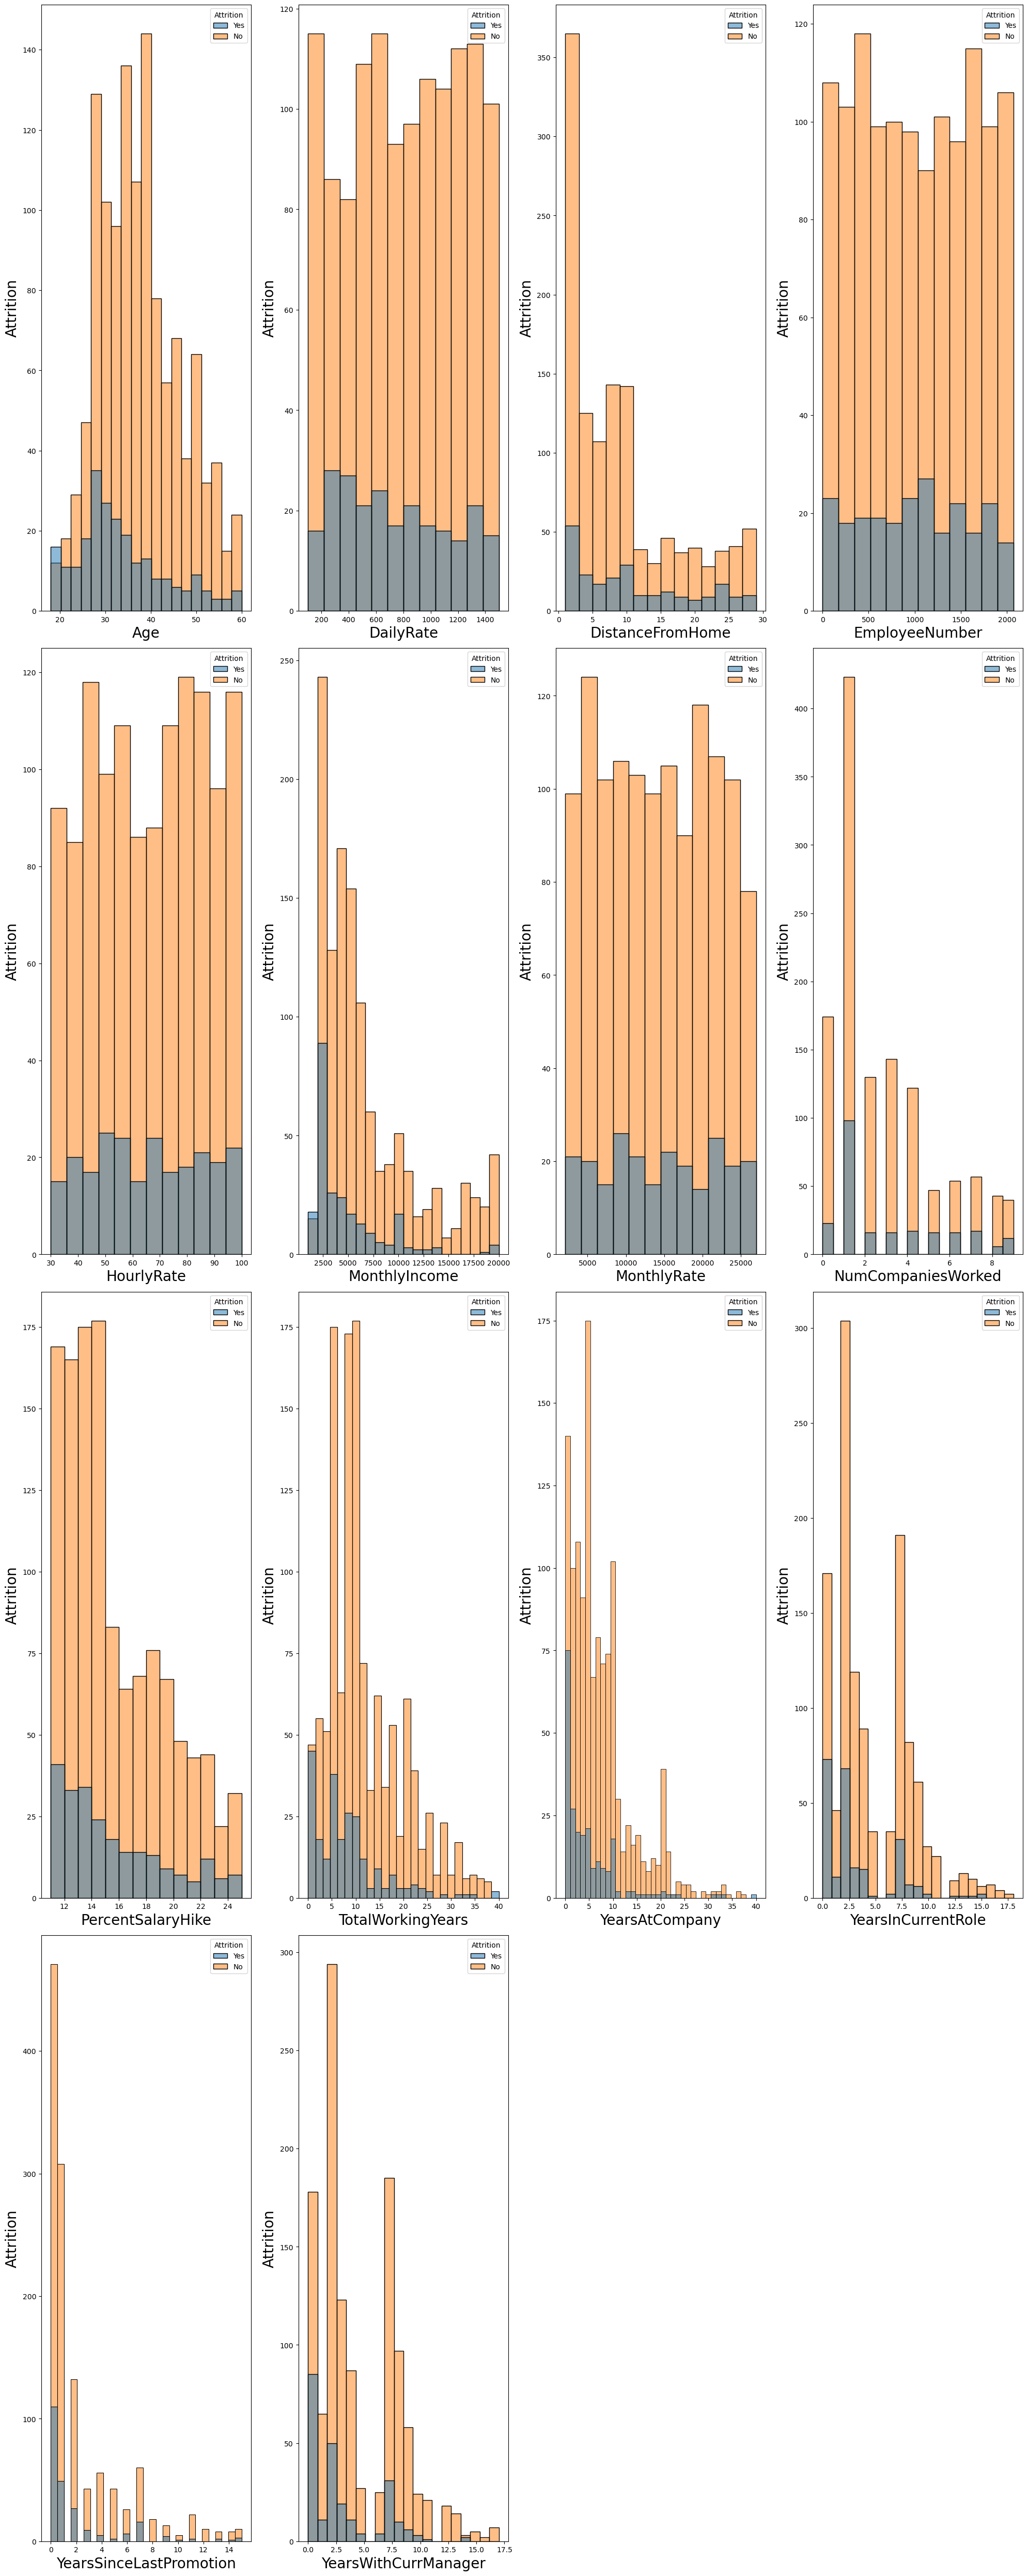

In [32]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column].dropna(axis=0)
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Age vs Attrition : emp whose age is in range of 20 are more likely to quit their job
- DistanceFromHome : emp far from the company i.e > 15 then chances of quitting job are more
- MonthlyIncome : if who have income of < 2500 then are more like to quit the job
- PercentHike : if it < 15 then chances of quitting job are more
- TotalWorkingYears : if the working years is < 10 then chances of quitting job are more
- YearsInCurrentRole : if it is < 2.5 then chances of quitting job are more

### Final conclusions
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.


### Data Preprocessing 

In [33]:
# checking values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [34]:
# no missing values in the data

In [35]:
# checking duplicates data
df.duplicated().sum()

0

In [36]:
# no duplicates record found

In [37]:
# Encoding

In [38]:
cat_data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [40]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [41]:
df['Attrition'] = lc.fit_transform(df['Attrition'])

In [42]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

<Axes: xlabel='BusinessTravel', ylabel='count'>

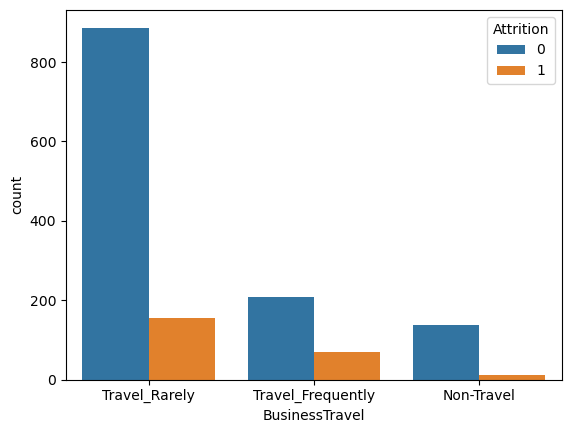

In [43]:
sns.countplot(x=df['BusinessTravel'],hue=df['Attrition'],data=df)

In [44]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':0})

In [45]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

<Axes: xlabel='Department', ylabel='count'>

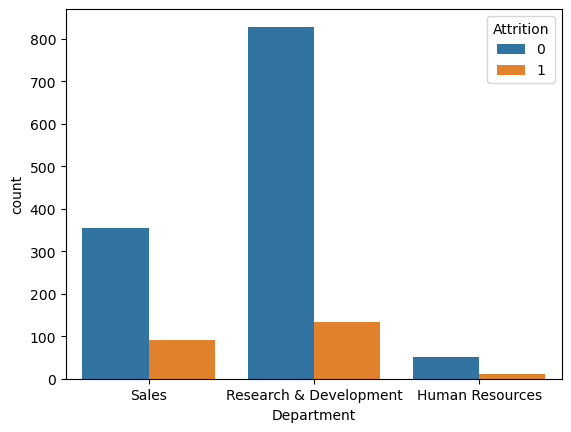

In [46]:
sns.countplot(x=df['Department'],hue=df['Attrition'],data=df)

In [47]:
df['Department'] = df['Department'].map({'Sales':2,'Research & Development':1,'Human Resources':0})

In [48]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [49]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

<Axes: xlabel='EducationField', ylabel='count'>

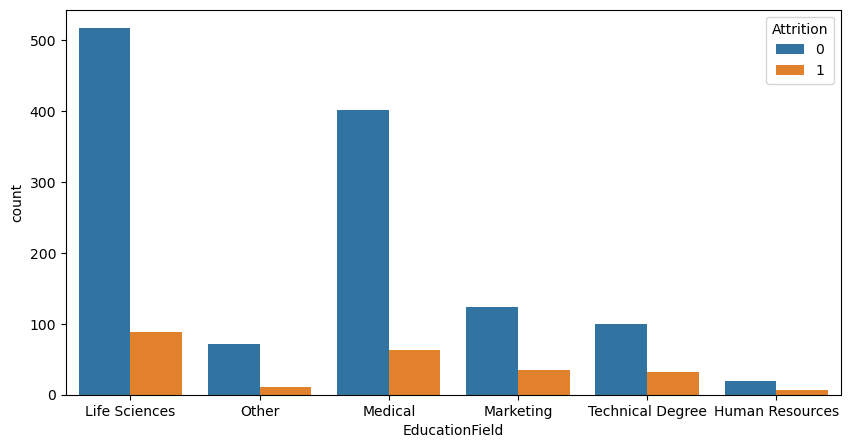

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['EducationField'],hue=df['Attrition'],data=df)

In [51]:
df.EducationField=df.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })

In [52]:
df['Gender'] = lc.fit_transform(df['Gender'])

In [53]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

<Axes: xlabel='JobRole', ylabel='count'>

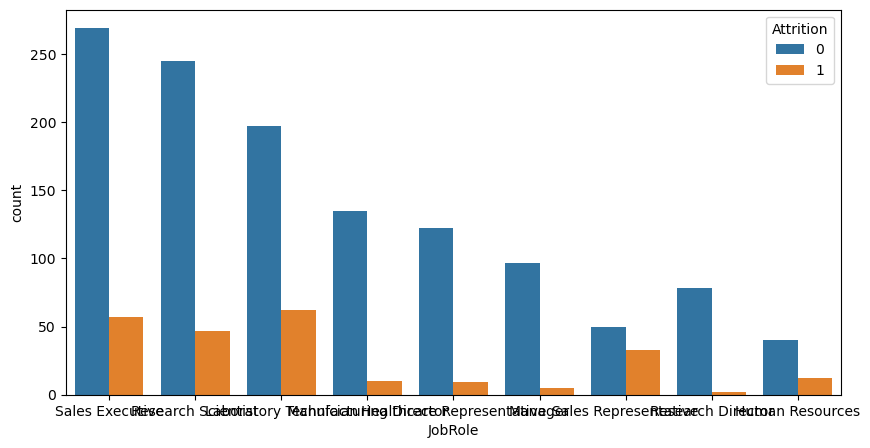

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['JobRole'],hue=df['Attrition'],data=df)

In [55]:
df.JobRole=df.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,
                              'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0 })

In [56]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

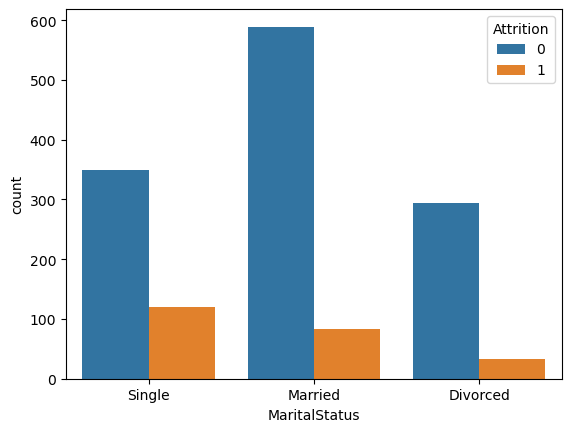

In [57]:
sns.countplot(x=df['MaritalStatus'],hue=df['Attrition'],data=df)

In [58]:
df.MaritalStatus=lc.fit_transform(df.MaritalStatus)

In [59]:
df.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

<Axes: xlabel='OverTime', ylabel='count'>

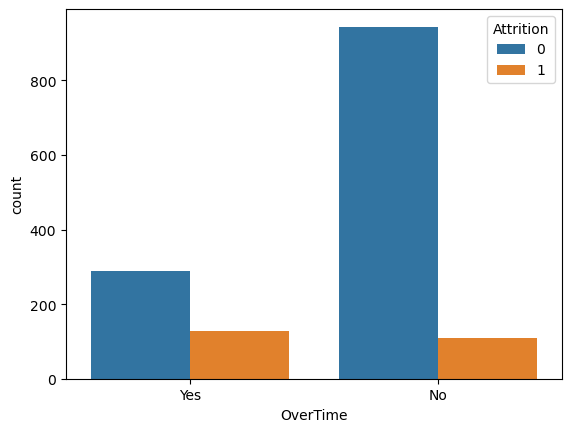

In [60]:
sns.countplot(x=df['OverTime'],hue=df['Attrition'],data=df)

In [61]:
df['OverTime'] = lc.fit_transform(df['OverTime'])

In [62]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,5,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,5,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,1,1,4,4,1,92,2,1,8,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,5,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,4,1,7,1,1,40,3,1,8,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


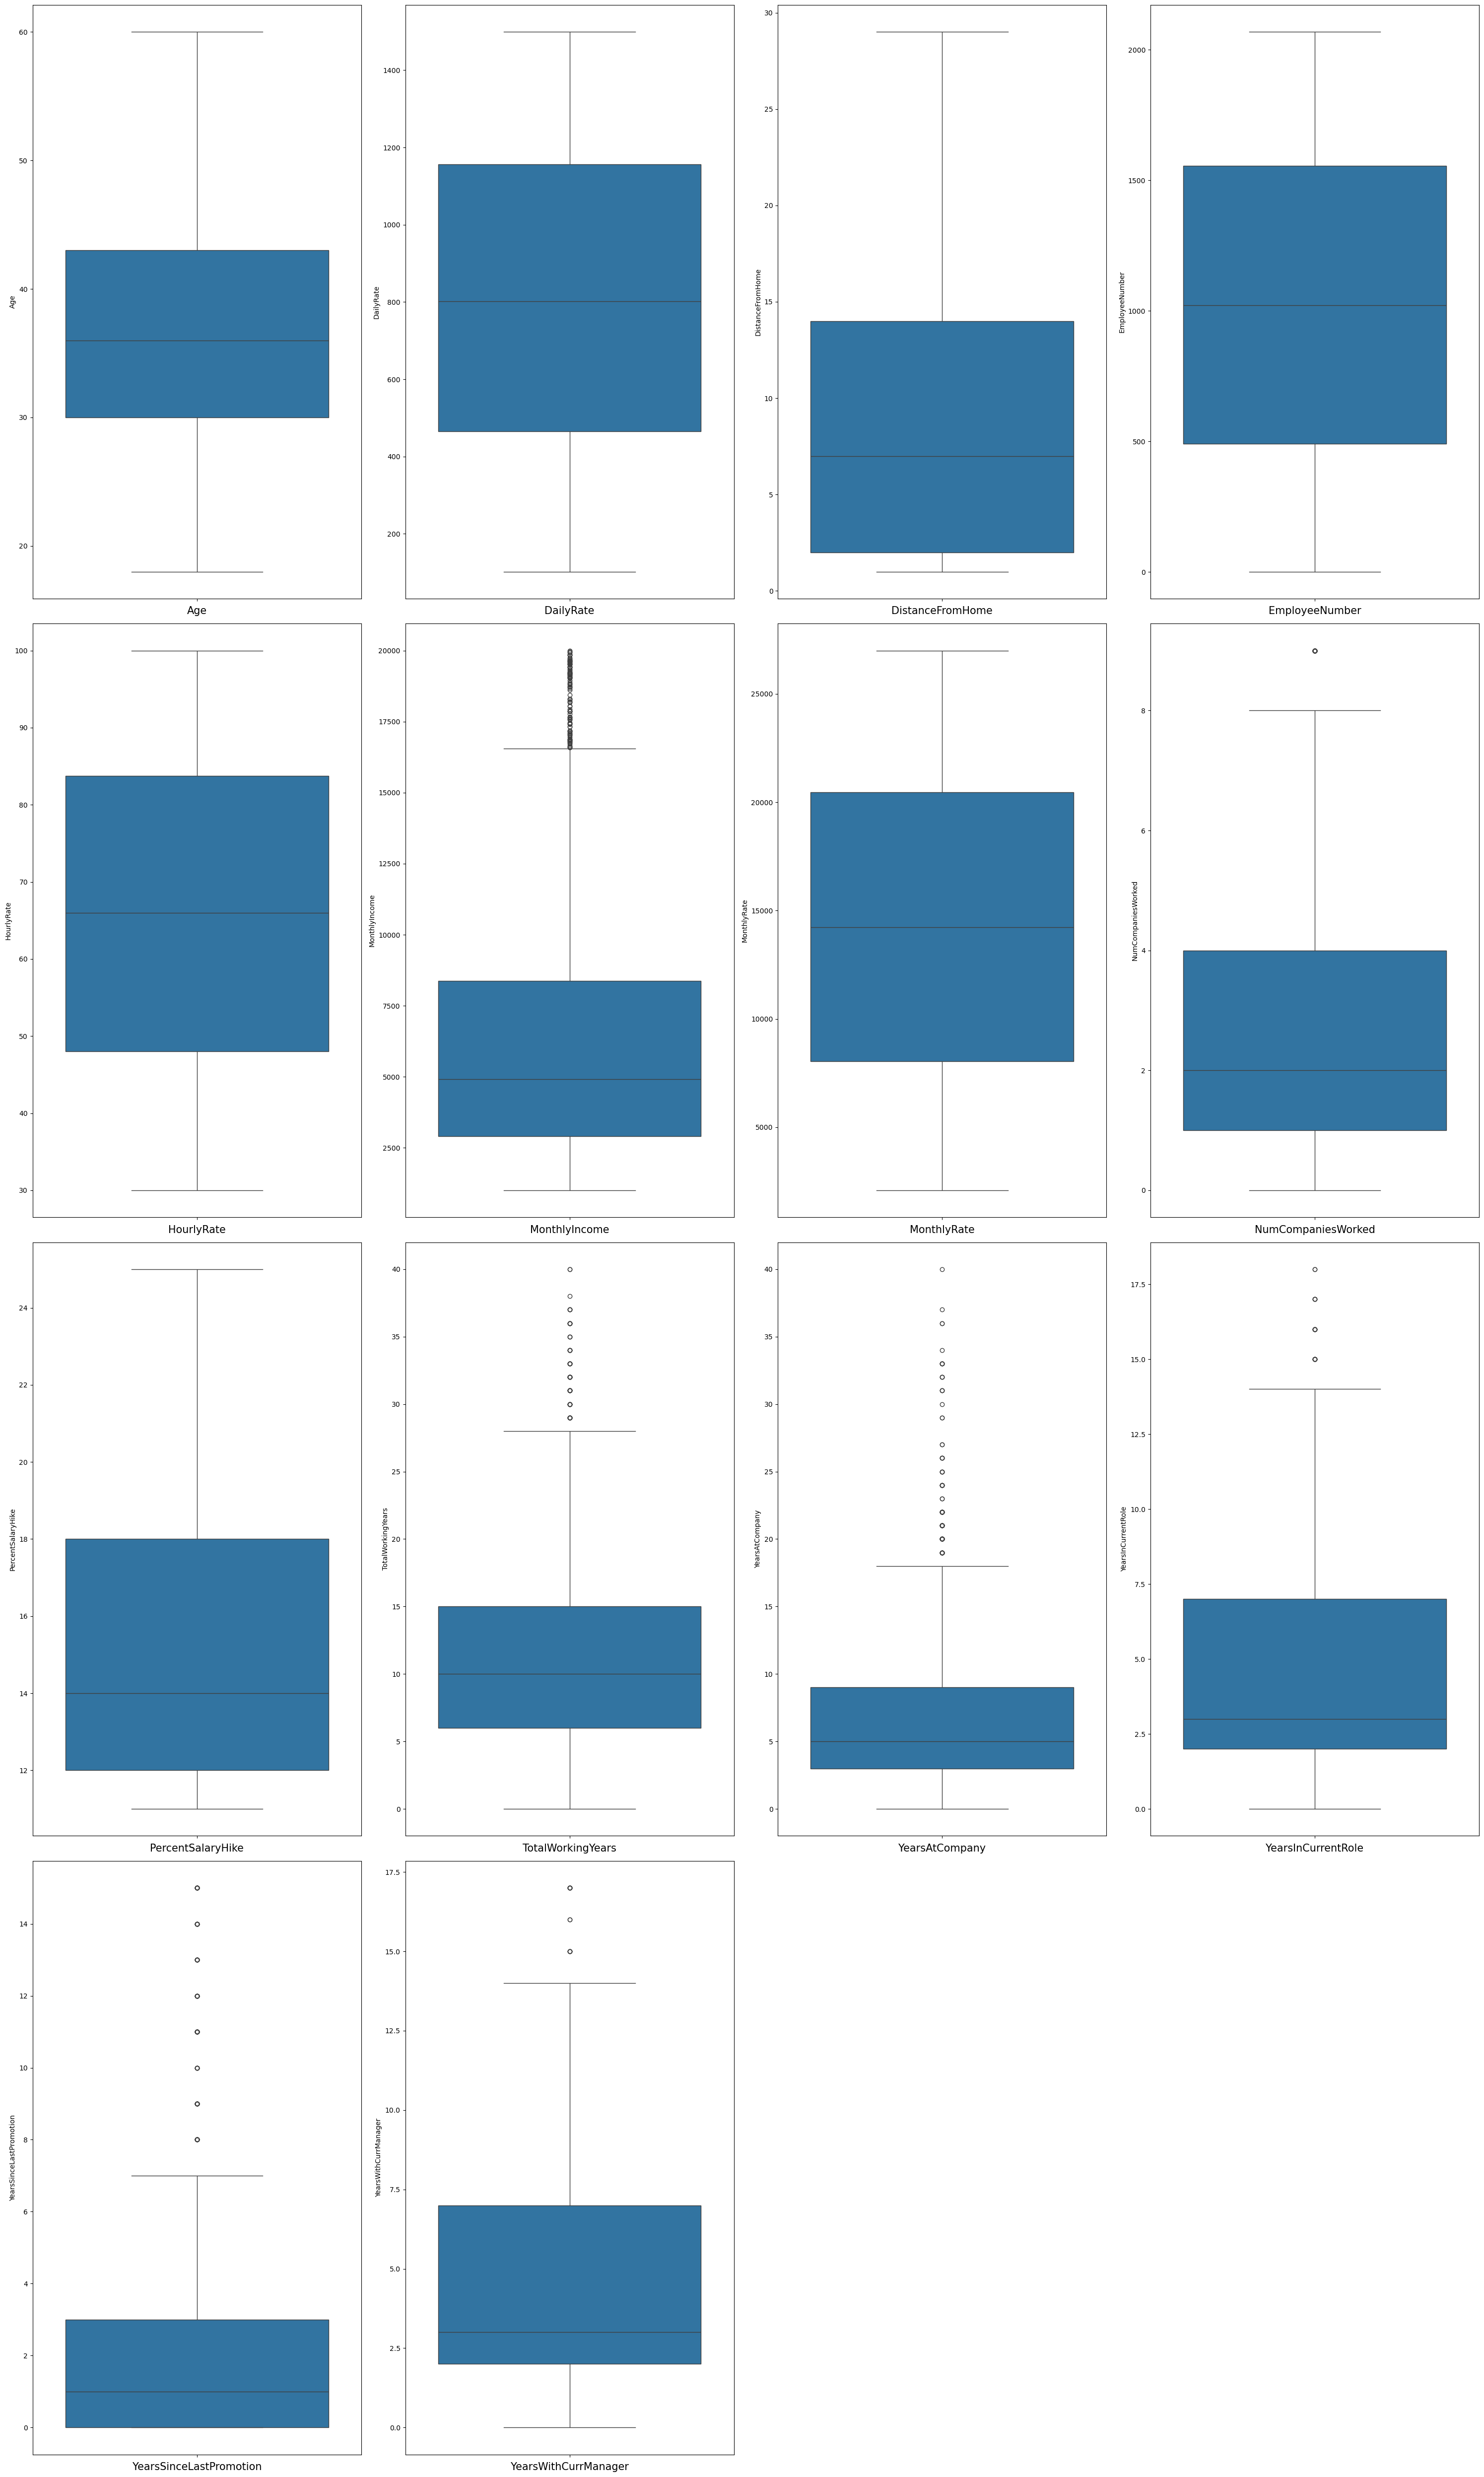

In [63]:
plt.figure(figsize=(30,50))
pltno = 1
for col in data2 :
    if pltno <=16 :
        ax = plt.subplot(4,4,pltno)
        sns.boxplot(data2[col])
        plt.xlabel(col,fontsize=15)
    pltno +=1
plt.tight_layout()

In [64]:
# we are not going to handle outliers bcoz DT is robust to outliers

### Feature Selection

In [65]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
# this col contais constant data

<Axes: >

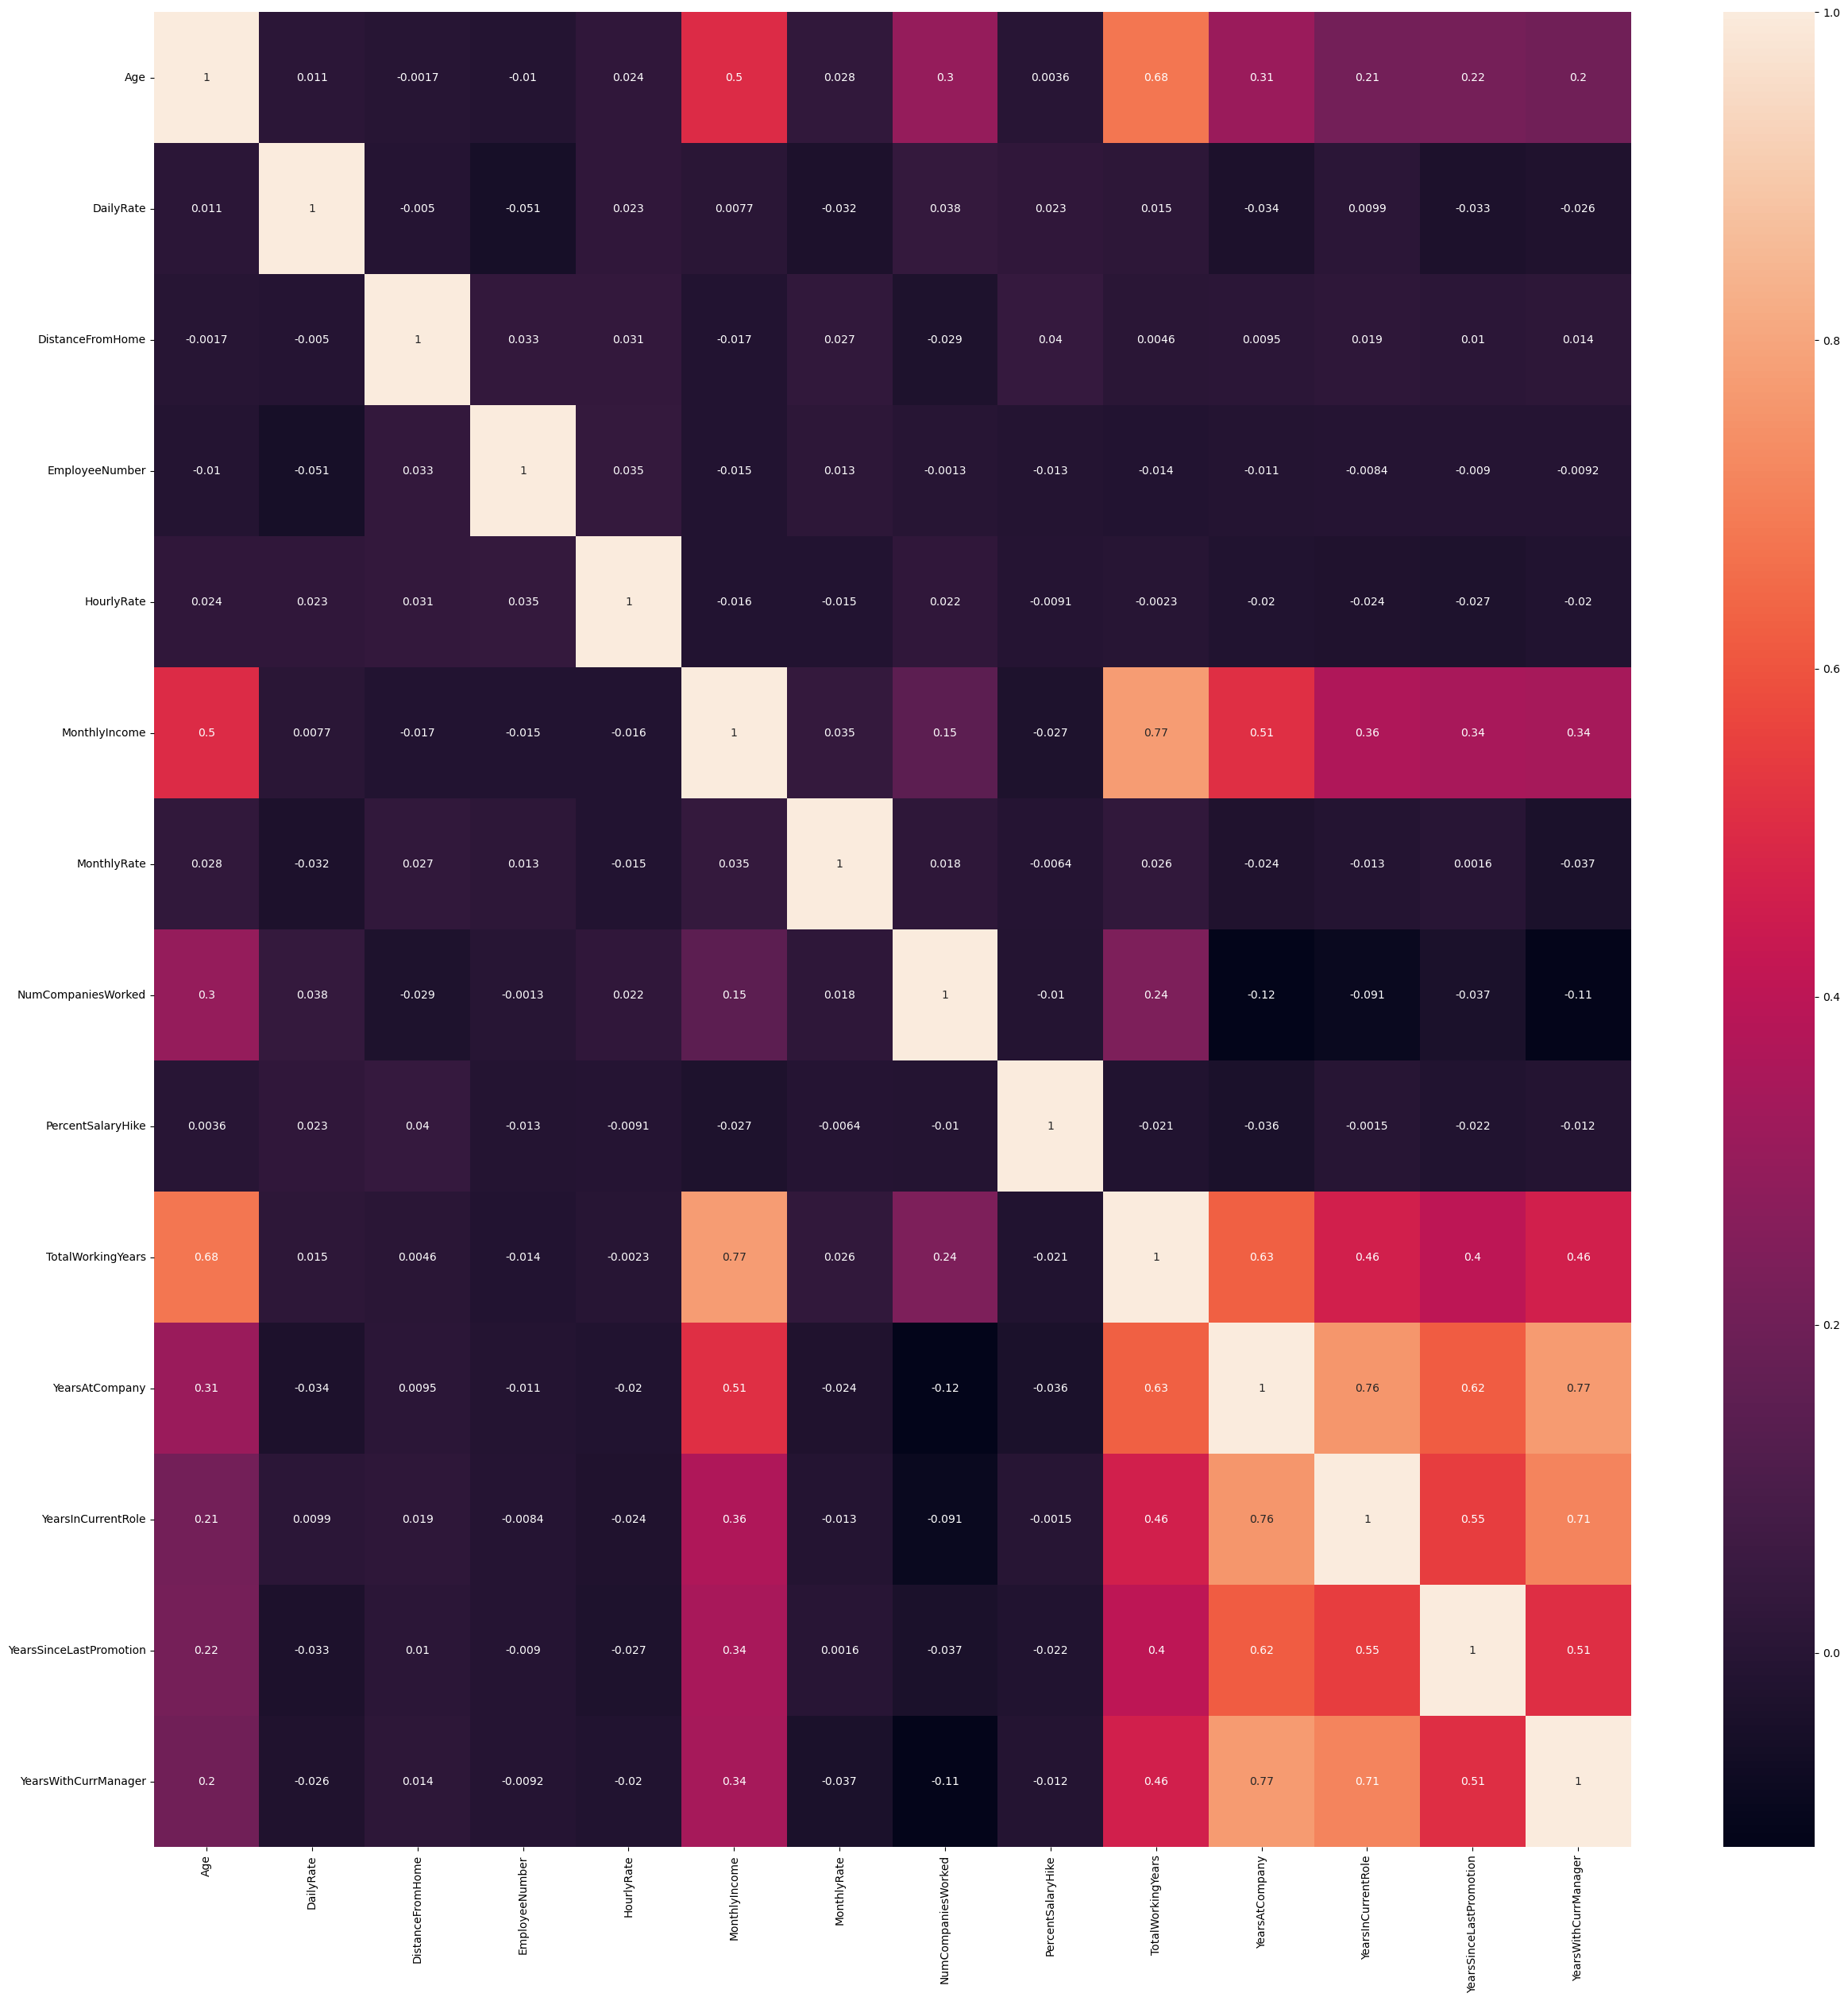

In [66]:
plt.figure(figsize=(30, 30))
sns.heatmap(data2.corr(), annot=True)

In [67]:
# no correlation found 

### Model creation

In [68]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [71]:
# data is immbalanced
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,5,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,5,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,1,4,1,92,2,1,8,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,4,1,1,40,3,1,8,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [72]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_smote,y_smote=sm.fit_resample(X_train,y_train)

In [73]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [74]:
from collections import Counter
print("Actual",Counter(y_train))
print("After smote",Counter(y_smote))

Actual Counter({0: 913, 1: 189})
After smote Counter({0: 913, 1: 913})


In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_smote,y_smote)
y_hat=dt.predict(X_test)

In [77]:
dt

DecisionTreeClassifier()

In [78]:
#predicting training data to check training performance
y_train_predict=dt.predict(X_train)
y_train_predict

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [80]:
##Training accuracy
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [81]:
#testing accuracy
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.7309782608695652

In [82]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       320
           1       0.22      0.42      0.29        48

    accuracy                           0.73       368
   macro avg       0.56      0.60      0.56       368
weighted avg       0.81      0.73      0.76       368



In [83]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

In [84]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'})


In [85]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_leaf= 1,min_samples_split=3,splitter='random')
dt1.fit(X_smote,y_smote)
y_hat1=dt1.predict(X_test)
y_hat1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [86]:
y_train_predict=dt1.predict(X_smote)
y_train_predict

array([0, 0, 0, ..., 1, 1, 0])

In [87]:
acc_test=accuracy_score(y_test,y_hat1)
acc_test

0.7771739130434783

In [88]:
accuracy_score(y_smote,y_train_predict)

0.9775465498357064

In [89]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       320
           1       0.28      0.46      0.35        48

    accuracy                           0.78       368
   macro avg       0.60      0.64      0.61       368
weighted avg       0.83      0.78      0.80       368



In [90]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

In [91]:
y_predict=rf_clf.predict(X_test)

In [92]:
accuracy_score(y_test,y_predict)

0.8505434782608695

In [93]:
y_train_predict=rf_clf.predict(X_train)

In [94]:
accuracy_score(y_train,y_train_predict)

1.0

In [95]:
# Hyparameter tuning of RF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=11)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features='sqrt', max_depth= 20, bootstrap= False)#passing best parameter to randomforest
rf_clf2.fit(X_smote, y_smote)

In [ ]:
y_predict1=rf_clf2.predict(X_test)